In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import plotly.graph_objs as go
# import plotly.figure_factory as ff
# from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

4.5.4


In [3]:
import cufflinks as cf

In [4]:
import plotly.graph_objs as go

In [5]:

import plotly.figure_factory as ff

In [96]:
#Dimensionality Reduction and Clustering
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches 
import time

In [97]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [99]:
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df["Class"].unique()

array([0, 1], dtype=int64)

In [8]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

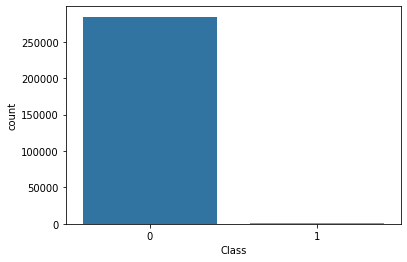

In [16]:
sns.countplot(x = "Class",data = df)

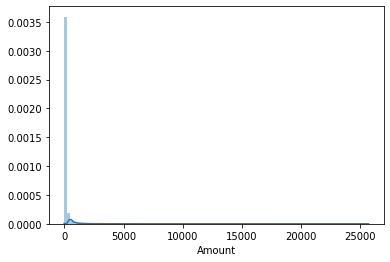

In [23]:
sns.distplot(df["Amount"],bins = 100)

In [38]:
class_0 = df.loc[df["Class"]==0]["Time"]
class_1 = df.loc[df["Class"]==1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

KeyError: 'Time'

In [7]:
# To scale the amount and time columns
from sklearn.preprocessing import StandardScaler, RobustScaler

In [8]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

In [9]:
df["Amount"].values.reshape(-1,1)

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [ 67.88],
       [ 10.  ],
       [217.  ]])

In [10]:
df['scaled_amount'] = rob_scaler.fit_transform(df["Amount"].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df["Time"].values.reshape(-1,1))
df.drop(['Time','Amount'],axis = 1, inplace = True)

In [11]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount','scaled_time'],axis = 1, inplace = True)
df.insert(0,'scaled_amt',scaled_amount)
df.insert(1,'scaled_time',scaled_time)
df.head()

,scaled_amt,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [145]:
#split data before RandomUnderSampling technique
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [13]:
X = df.drop("Class", axis = 1)
Y = df["Class"]
s = StratifiedKFold(n_splits=5,random_state=None, shuffle = False)
s.get_n_splits(X,Y)

5

In [14]:
for train_index,test_index in s.split(X,Y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_Ytrain, original_Ytest = Y.iloc[train_index], Y.iloc[test_index]

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [15]:
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_Ytrain = original_Ytrain.values
original_Ytest = original_Ytest.values

In [16]:
train_unique_label, train_counts_label = np.unique(original_Ytrain,return_counts= True)

In [17]:
train_counts_label

array([227452,    394], dtype=int64)

In [18]:
train_unique_label

array([0, 1], dtype=int64)

In [19]:
test_unique_label, test_counts_label = np.unique(original_Ytest,return_counts = True)

In [21]:
test_counts_label

array([56863,    98], dtype=int64)

In [23]:
print(train_counts_label/ len(original_Ytrain))
print(test_counts_label/ len(original_Ytest))

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [24]:
#Random UnderSampling: removing data for balanced dataset
df = df.sample(frac = 1)

In [72]:
fraud_df = df.loc[df["Class"]==1]
notfraud_df = df.loc[df["Class"]==0][:492]

In [73]:
new = pd.concat([fraud_df,notfraud_df])
new = new.sample(frac = 1)
new.head()

,scaled_amt,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
218475,-0.237686,0.665398,-0.852000,-0.130753,1.366625,-0.375116,1.257245,0.050009,-0.218389,0.176564,...,0.281607,0.277023,0.786877,-0.262423,0.097049,0.200534,-0.115078,0.141612,0.159208,0
42007,-0.296793,-0.514268,-3.140260,3.367342,-2.778931,3.859701,-1.159518,-0.721552,-4.195342,-0.598346,...,0.077781,2.452339,-0.292963,-0.189330,-0.166482,0.038040,-0.015477,0.776691,0.397557,1
240050,-0.153846,0.772049,2.094070,-0.013132,-1.340072,0.250221,0.288294,-0.787291,0.261593,-0.359661,...,-0.108273,-0.315669,-0.735315,0.232632,-0.622206,-0.169917,0.233885,-0.065722,-0.062829,0
151009,-0.293440,0.113606,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,...,2.812241,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1
51762,2.346818,-0.465043,0.966127,-0.655004,0.025321,0.213473,-0.413925,-0.132865,0.087265,-0.135472,...,0.355644,-0.270364,-1.001909,-0.181311,-0.495996,0.279365,0.860547,-0.096491,0.030503,0


In [74]:
new['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

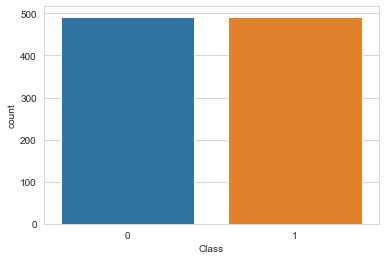

In [75]:
sns.countplot('Class', data=new)

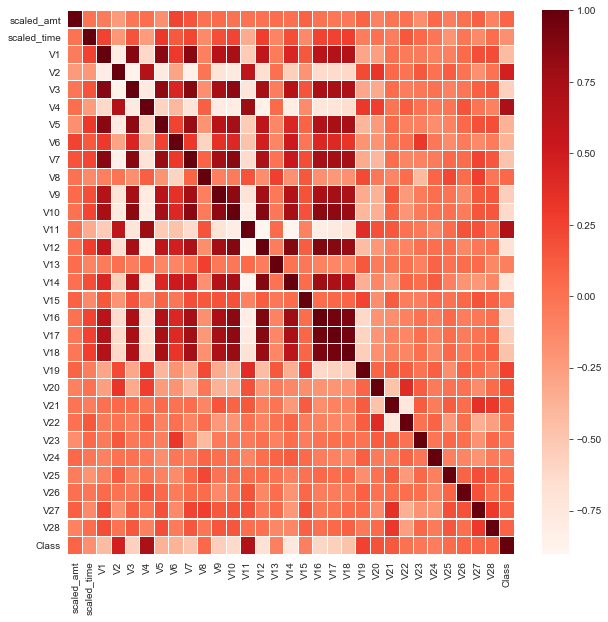

In [76]:
plt.figure(figsize = (10,10))
corr = new.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

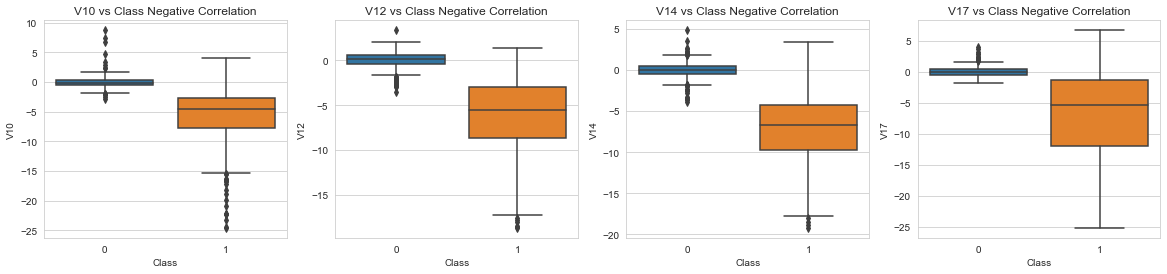

In [77]:
sns.set_style('whitegrid')
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x="Class", y="V10", data=new, ax=axes[0])
axes[0].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new, ax=axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V14", data=new, ax=axes[2])
axes[2].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V17", data=new, ax=axes[3])
axes[3].set_title('V17 vs Class Negative Correlation')

plt.show()
#V14 has highest negative correlation

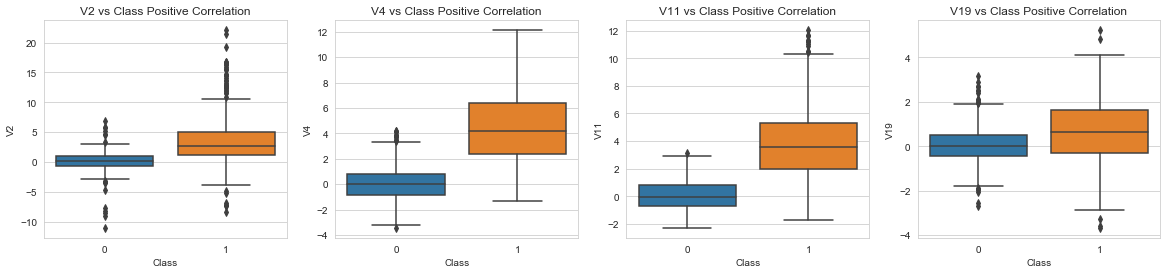

In [78]:
sns.set_style('whitegrid')
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x="Class", y="V2", data=new,  ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new,  ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V11", data=new,  ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new,  ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

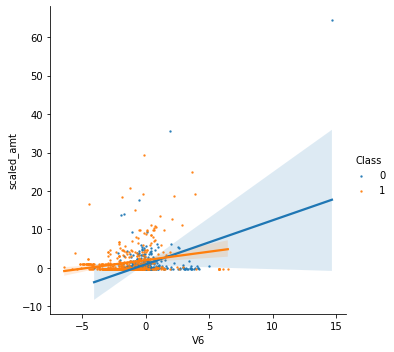

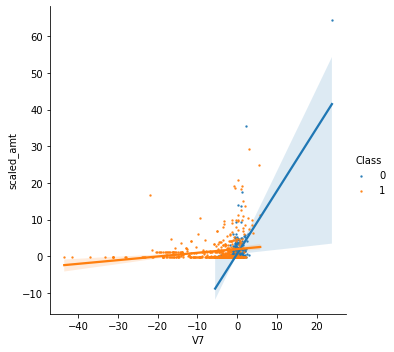

In [47]:
s = sns.lmplot(x='V6', y='scaled_amt',data=new, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='scaled_amt',data=new, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

C:\Users\Intel\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\Intel\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



<Figure size 432x288 with 0 Axes>

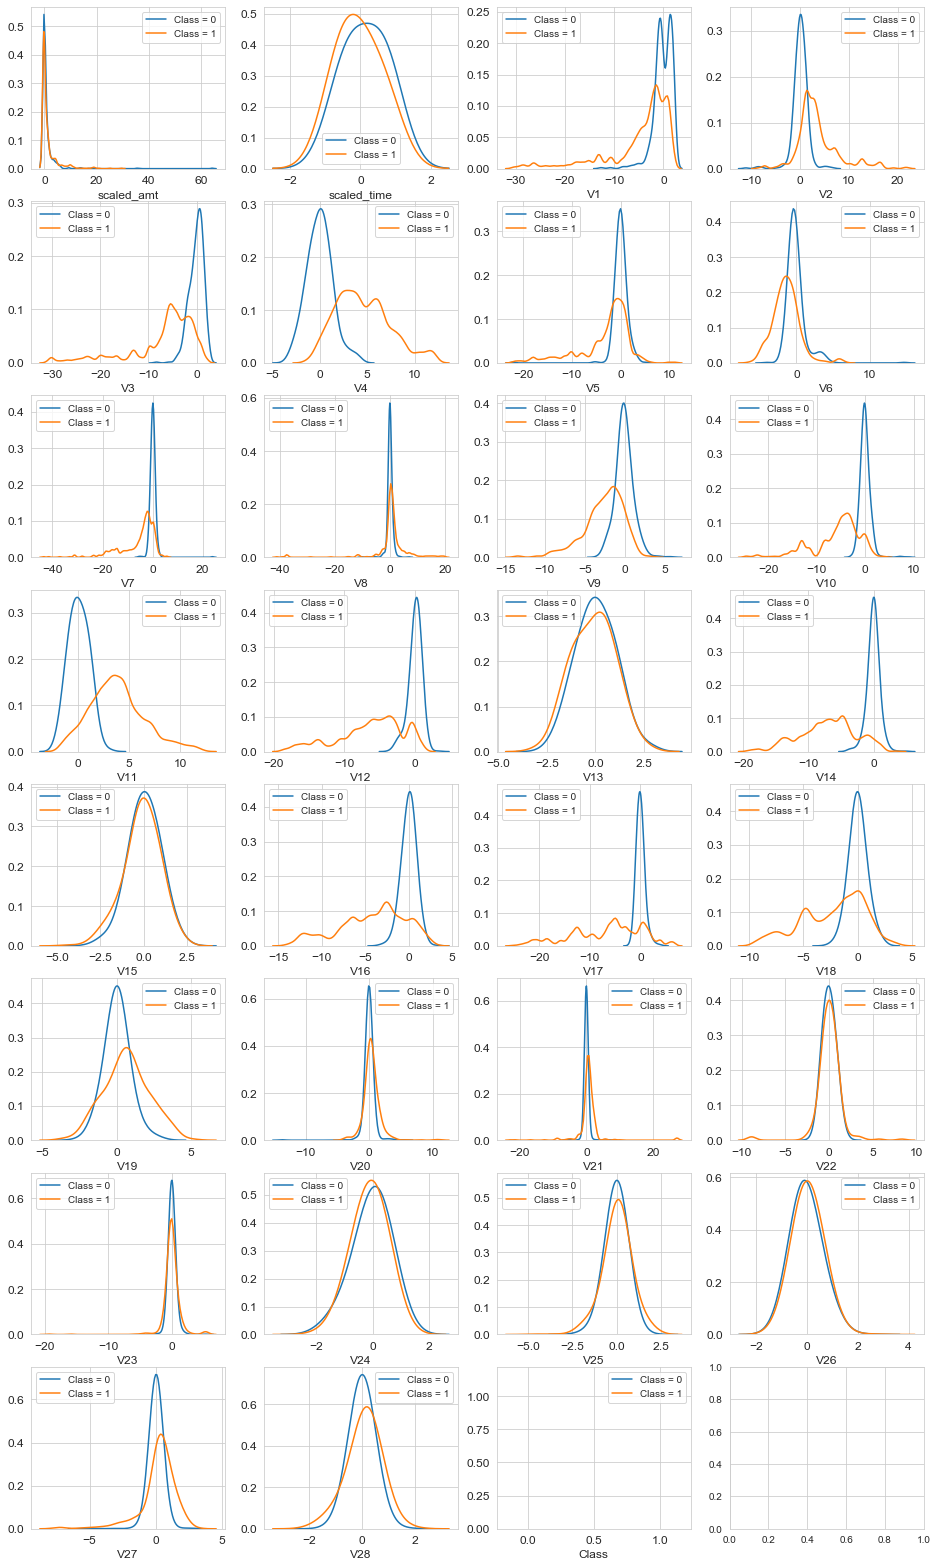

In [48]:
var =  new.columns.values

i = 0
t0 = new.loc[new['Class'] == 0]
t1 = new.loc[new['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [79]:
from scipy.stats import norm

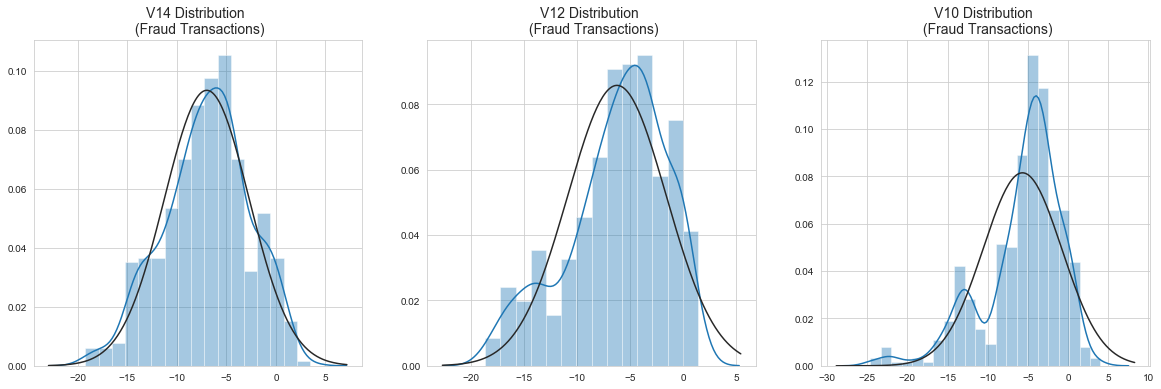

In [80]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new['V14'].loc[new['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm)
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new['V12'].loc[new['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm)
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new['V10'].loc[new['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm)
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()
#black line due to fit = norm

In [81]:
# Removing Outliers from V14
V14_fraud = new['V14'].loc[new['Class']==1].values
q25,q75 = np.percentile(V14_fraud,25), np.percentile(V14_fraud,75)

In [82]:
V14_iqr = q75-q25
V14_cutoff = V14_iqr*1.5
V14_lower = q25-V14_cutoff
V14_upper = q75+V14_cutoff
print("Quartile 25: {}".format(q25))
print("Quartile 75: {}".format(q75))
print("CutOff:       {}".format(V14_cutoff))
print("Lower:       {}".format(V14_lower))
print("Upper:        {}".format(V14_upper))

Quartile 25: -9.692722964972385
Quartile 75: -4.282820849486866
CutOff:       8.114853173228278
Lower:       -17.807576138200663
Upper:        3.8320323237414122


In [83]:
outliers = [x for x in V14_fraud if x > V14_upper or x < V14_lower]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

new = new.drop(new[(new['V14']<V14_lower) | (new['V14']>V14_upper)].index)

Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-18.4937733551053, -19.2143254902614, -18.8220867423816, -18.049997689859396]


In [84]:
# Removing outliers from V12
V12_fraud = new['V12'].loc[new['Class']==1].values
q25,q75 = np.percentile(V12_fraud,25), np.percentile(V12_fraud,75)

V12_iqr = q75-q25
V12_cutoff = V12_iqr*1.5
V12_lower = q25-V12_cutoff
V12_upper = q75+V12_cutoff
print("Quartile 25: {}".format(q25))
print("Quartile 75: {}".format(q75))
print("CutOff:       {}".format(V12_cutoff))
print("Lower:       {}".format(V12_lower))
print("Upper:        {}".format(V12_upper))

Quartile 25: -8.67303320439115
Quartile 75: -2.893030568676315
CutOff:       8.670003953572252
Lower:       -17.3430371579634
Upper:        5.776973384895937


In [85]:
outliers = [x for x in V12_fraud if x > V12_upper or x < V12_lower]
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V12 outliers:{}'.format(outliers))

new = new.drop(new[(new['V12']<V12_lower) | (new['V12']>V12_upper)].index)
print('Number of Instances after outliers removal: {}'.format(len(new)))

Feature V12 Outliers for Fraud Cases: 4
V12 outliers:[-18.683714633344298, -18.4311310279993, -18.047596570821604, -18.553697009645802]
Number of Instances after outliers removal: 975


In [89]:
# Removing outliers from V10
V10_fraud = new['V10'].loc[new['Class']==1].values
q25,q75 = np.percentile(V10_fraud,25), np.percentile(V10_fraud,75)

V10_iqr = q75-q25
V10_cutoff = V10_iqr*1.5
V10_lower = q25-V10_cutoff
V10_upper = q75+V10_cutoff
print("Quartile 25: {}".format(q25))
print("Quartile 75: {}".format(q75))
print("CutOff:       {}".format(V10_cutoff))
print("Lower:       {}".format(V10_lower))
print("Upper:        {}".format(V10_upper))

Quartile 25: -7.466658535821848
Quartile 75: -2.5118611381562523
CutOff:       7.4321960964983935
Lower:       -14.89885463232024
Upper:        4.920334958342141


In [90]:
outliers = [x for x in V10_fraud if x > V10_upper or x < V10_lower]
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new = new.drop(new[(new['V10']<V10_lower) | (new['V10']>V10_upper)].index)
print('Number of Instances after outliers removal: {}'.format(len(new)))

Feature V10 Outliers for Fraud Cases: 27
V10 outliers:[-22.1870885620007, -22.1870885620007, -15.346098846877501, -18.2711681738888, -16.2556117491401, -16.7460441053944, -16.6011969664137, -16.3035376590131, -15.124162814494698, -20.949191554361104, -24.5882624372475, -18.9132433348732, -24.403184969972802, -17.141513641289198, -15.563791338730098, -15.1237521803455, -15.2399619587112, -15.563791338730098, -16.6496281595399, -15.2318333653018, -15.2399619587112, -23.2282548357516, -14.9246547735487, -22.1870885620007, -14.9246547735487, -19.836148851696, -22.1870885620007]
Number of Instances after outliers removal: 945


Text(0.5, 1.0, 'V10 Feature \n Reduction of outliers')

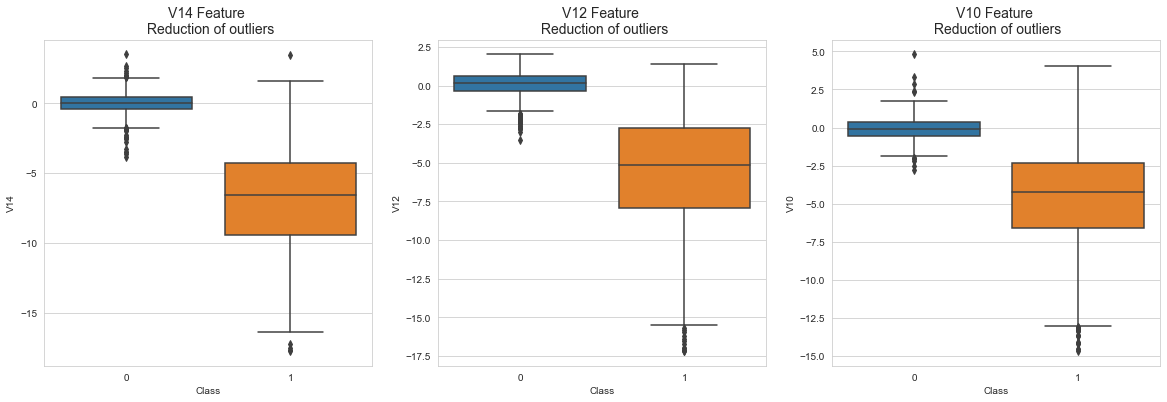

In [92]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

sns.boxplot(x="Class", y="V14", data=new,ax=ax1)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Class", y="V12", data=new, ax=ax2)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Class", y="V10", data=new, ax=ax3)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)

In [107]:
# Dimensionality Reduction and Clustering
X = new.drop('Class', axis = 1)
Y = new['Class']

In [108]:
#T-SNE:
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 3.9 s


In [111]:
#PCA:
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

PCA took 0.016 s


In [112]:
#Truncated SVD:
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

Truncated SVD took 0.0 s


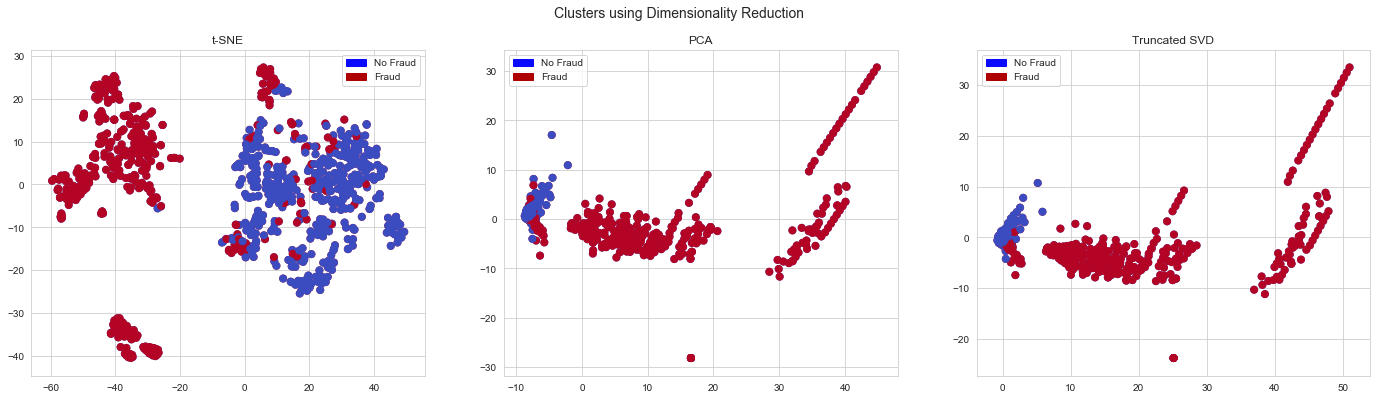

In [118]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))

f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

#TNE Plot:
ax1.scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1],c = (Y==0),cmap = 'coolwarm',label = "No Fraud", linewidths = 2)
ax1.scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1],c = (Y==1),cmap = 'coolwarm',label = "Fraud", linewidths = 2)
ax1.set_title('t-SNE')
ax1.legend(handles=[blue_patch, red_patch])

#PCA Plot:
ax2.scatter(X_reduced_pca[:,0],X_reduced_pca[:,1],c = (Y==0),cmap = 'coolwarm',label = "No Fraud", linewidths = 2)
ax2.scatter(X_reduced_pca[:,0],X_reduced_pca[:,1],c = (Y==1),cmap = 'coolwarm',label = "Fraud", linewidths = 2)
ax2.set_title('PCA')
ax2.legend(handles=[blue_patch, red_patch])

#Truncated SVD:
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(Y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(Y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD')
ax3.legend(handles=[blue_patch, red_patch])

In [175]:
# CLassifiers(Under Sampling):
X = new.drop('Class',axis = 1)
Y = new['Class']

In [176]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [177]:
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

In [123]:
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [125]:
from sklearn.model_selection import cross_val_score

for key,classifier in classifiers.items():
    classifier.fit(X_train,Y_train)
    training_score = cross_val_score(classifier,X_train,Y_train,cv = 5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of",
          round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 89.0 % accuracy score


In [127]:
#GridSearch CV to find best parameters:
from sklearn.model_selection import GridSearchCV

#Logistic Regression
log_reg_params = {"penalty":['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
grid_log_reg = GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(X_train,Y_train)
log_reg = grid_log_reg.best_estimator_

In [130]:
#KNearest:
knear_params = {"n_neighbors": list(range(2,5,1)), "algorithm": ['auto','ball_tree','kd_tree','brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(),knear_params)
grid_knears.fit(X_train,Y_train)
knears_neighbors = grid_knears.best_estimator_

In [131]:
#SVC:
svc_params = {'C':[0.5,0.7, 0.9, 1], 'kernel':['rbf','poly','linear','sigmoid']}
grid_svc = GridSearchCV(SVC(),svc_params)
grid_svc.fit(X_train,Y_train)
svc = grid_svc.best_estimator_

In [132]:
#Decision Tree Classifier:
tree_params = {"criterion":["gini","entropy"],"max_depth":list(range(2,4,1)),"min_samples_leaf":list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(),tree_params)
grid_tree.fit(X_train,Y_train)
tree = grid_tree.best_estimator_

In [135]:
log_reg_score = cross_val_score(log_reg,X_train,Y_train,cv = 5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, Y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, Y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree, X_train, Y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.25%
Knears Neighbors Cross Validation Score 93.65%
Support Vector Classifier Cross Validation Score 93.25%
DecisionTree Classifier Cross Validation Score 91.0%


In [137]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train,Y_train, cv=5,method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, Y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, Y_train, cv=5,method="decision_function")

tree_pred = cross_val_predict(tree, X_train, Y_train, cv=5)

In [150]:
#Undersampling:
undersample_X = df.drop('Class', axis=1)
undersample_Y = df['Class']
s = StratifiedKFold(n_splits=5,random_state=None, shuffle = False)

In [151]:
for train_index, test_index in s.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_Ytrain, undersample_Ytest = undersample_Y.iloc[train_index], undersample_Y.iloc[test_index]

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_Ytrain = undersample_Ytrain.values
undersample_Ytest = undersample_Ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

Train: [ 56962  56963  56964 ... 284804 284805 284806] Test: [    0     1     2 ... 56959 56960 56961]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56962  56963  56964 ... 118440 118532 118934]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113910 113911 113912 ... 173978 174515 175402]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170877 170878 170879 ... 229705 229745 230551]
Train: [     0      1      2 ... 229705 229745 230551] Test: [227843 227844 227845 ... 284804 284805 284806]


In [152]:
#NearMissTechnique:
X_nearmiss, Y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_Y.values)
print('NearMiss Label Distribution: {}'.format(Counter(Y_nearmiss)))

for train, test in s.split(undersample_Xtrain, undersample_Ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_Ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_Ytrain[test]))
    undersample_precision.append(precision_score(original_Ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_Ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_Ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_Ytrain[test], undersample_prediction))

NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [139]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(Y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(Y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(Y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(Y_train, tree_pred))

Logistic Regression:  0.9729168864971334
KNears Neighbors:  0.9327635327635327
Support Vector Classifier:  0.9672962611234216
Decision Tree Classifier:  0.905982905982906


In [140]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(Y_train, log_reg_pred)

In [141]:
from sklearn.metrics import recall_score,precision_score, f1_score, accuracy_score
Y_pred = log_reg.predict(X_train)

print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(Y_train, Y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(Y_train, Y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(Y_train, Y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(Y_train, Y_pred)))

Overfitting: 

Recall Score: 0.90
Precision Score: 0.98
F1 Score: 0.94
Accuracy Score: 0.95


In [153]:
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))

How it should be:

Accuracy Score: 0.79
Precision Score: 0.00
Recall Score: 0.17
F1 Score: 0.00


In [155]:
undersample_Y_score = log_reg.decision_function(original_Xtest)
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_Ytest, undersample_Y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.12


In [156]:
#SMOTE Technique(Oversampling):
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [158]:
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_Ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_Ytest)))

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961


In [159]:
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

In [171]:
log_reg_sm = LogisticRegression( )

In [181]:
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

In [162]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [183]:
for train, test in s.split(original_Xtrain, original_Ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_Ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_Ytrain[test]))
    precision_lst.append(precision_score(original_Ytrain[test], prediction))
    recall_lst.append(recall_score(original_Ytrain[test], prediction))
    f1_lst.append(f1_score(original_Ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_Ytrain[test], prediction))

In [164]:
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))

accuracy: 0.9434668413077192
precision: 0.06168171468932854
recall: 0.9162934112301201
f1: 0.1137205800147115


In [165]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_Ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.86      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961



In [166]:
y_score = best_est.decision_function(original_Xtest)
average_precision = average_precision_score(original_Ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.75


In [167]:
from sklearn.metrics import confusion_matrix

In [187]:
from sklearn.metrics import accuracy_score

In [188]:
Y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(Y_test, Y_pred)

In [190]:
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_Ytest, y_pred_sm)

In [191]:
d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

In [192]:
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

In [193]:
final_df

,Technique,Score
0,Random UnderSampling,0.783069
1,Oversampling (SMOTE),0.985885
